# Importing the data

In [1]:
# !pip install matplotlib

- The data has some badlines, we skip them.
- concatenate all data frame to create one

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
import prophet
from prophet import Prophet

In [3]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', encoding='iso-8859-1', on_bad_lines = 'warn')
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', encoding='iso-8859-1', on_bad_lines = 'warn')
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', encoding='iso-8859-1', on_bad_lines = 'warn')

Skipping line 533719: expected 23 fields, saw 24

Skipping line 1149094: expected 23 fields, saw 41



In [4]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3 ], ignore_index = False, axis = 0)

In [5]:
chicago_df.shape[0]

6017767

In [6]:
chicago_df.head(2)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"


In [7]:
chicago_df.tail(5)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


# Data Exploration

In [8]:
# plt.figure(figsize=(10,10))
# sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [9]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'Case Number', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat','Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [10]:
chicago_df.head(2)

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,4673626,04/02/2006 01:00:00 PM,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False


In [11]:
# reformatting the date column
chicago_df.Date = pd.to_datetime(chicago_df.Date, format ='%m/%d/%Y %I:%M:%S %p' )

In [12]:
chicago_df.Date

0         2006-04-02 13:00:00
1         2006-02-26 13:40:48
2         2006-01-08 23:16:00
3         2006-04-05 18:45:00
4         2006-02-17 21:03:14
                  ...        
1456709   2016-05-03 23:33:00
1456710   2016-05-03 23:30:00
1456711   2016-05-03 00:15:00
1456712   2016-05-03 21:07:00
1456713   2016-05-03 23:38:00
Name: Date, Length: 6017767, dtype: datetime64[ns]

In [13]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [14]:
chicago_df

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,10508679,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,10508680,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,10508681,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [15]:
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

In [16]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1245111
BATTERY                       1079178
CRIMINAL DAMAGE                702702
NARCOTICS                      674831
BURGLARY                       369056
OTHER OFFENSE                  368169
ASSAULT                        360244
MOTOR VEHICLE THEFT            271624
ROBBERY                        229467
DECEPTIVE PRACTICE             225180
CRIMINAL TRESPASS              171596
PROSTITUTION                    60735
WEAPONS VIOLATION               60335
PUBLIC PEACE VIOLATION          48403
OFFENSE INVOLVING CHILDREN      40260
Name: Primary Type, dtype: int64

In [17]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index
order_data

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
       'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

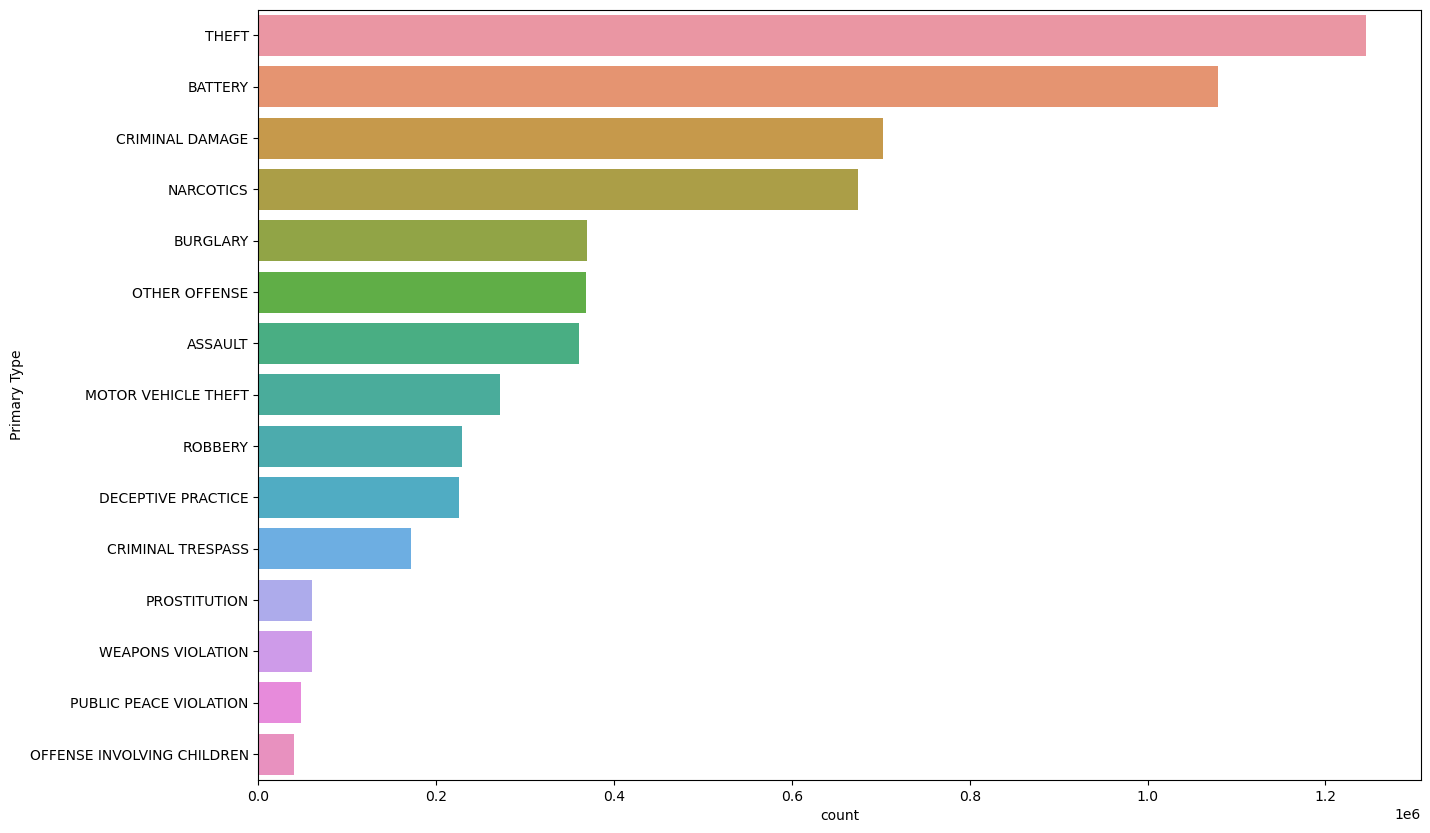

In [31]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = order_data)

In [19]:
chicago_df['Location Description'].value_counts().iloc[:15]

STREET                            1517724
RESIDENCE                          991977
SIDEWALK                           674793
APARTMENT                          668298
OTHER                              216154
PARKING LOT/GARAGE(NON.RESID.)     166331
ALLEY                              137094
SCHOOL, PUBLIC, BUILDING           128852
RESIDENCE-GARAGE                   119619
VEHICLE NON-COMMERCIAL             107554
RESIDENCE PORCH/HALLWAY            103649
SMALL RETAIL STORE                 103462
RESTAURANT                          89154
DEPARTMENT STORE                    72763
RESIDENTIAL YARD (FRONT/BACK)       72504
Name: Location Description, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Location Description'>

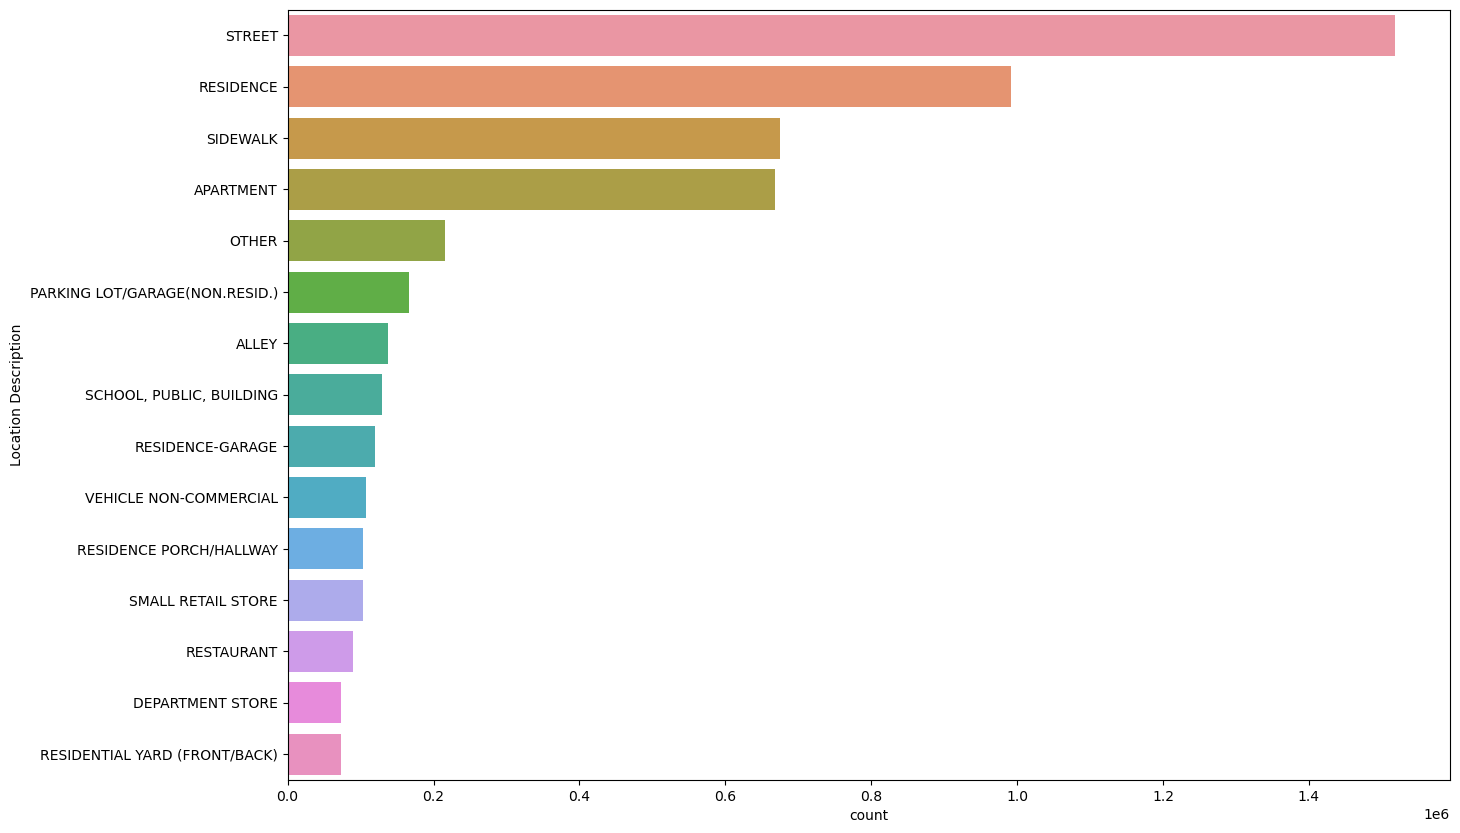

In [30]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index)

Text(0, 0.5, 'Number of Crimes')

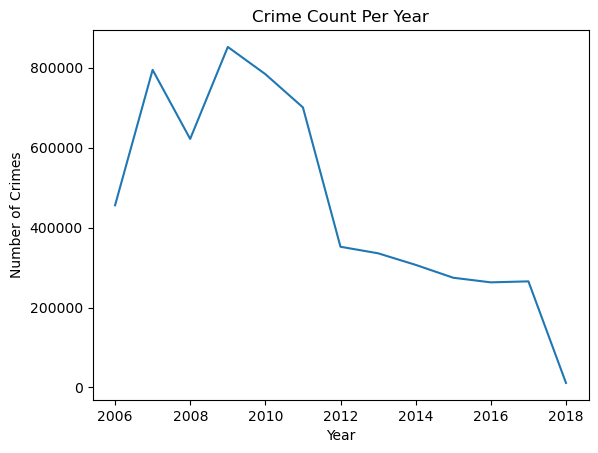

In [21]:
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

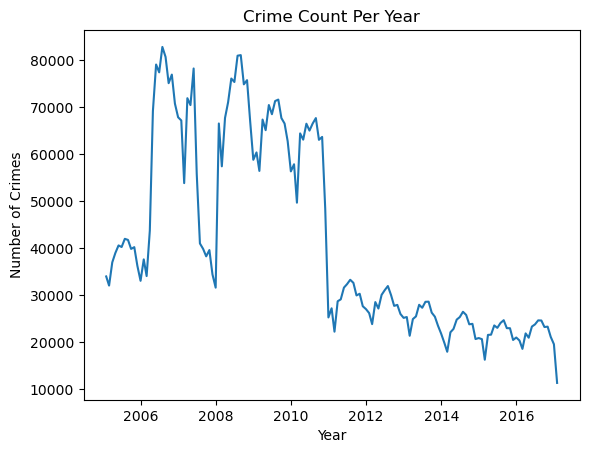

In [22]:
plt.plot(chicago_df.resample('M').size())
plt.title('Crime Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

Text(0, 0.5, 'Number of Crimes')

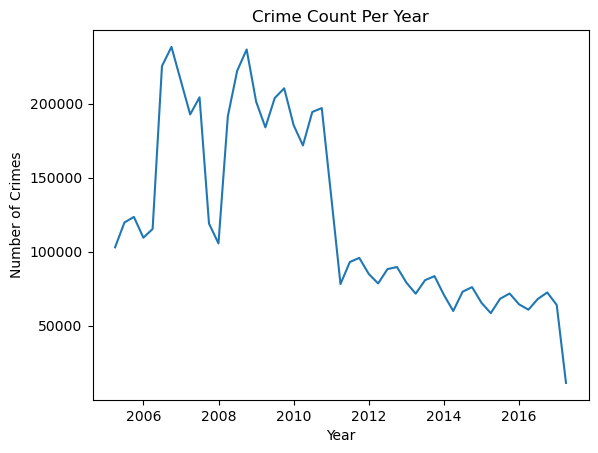

In [23]:
plt.plot(chicago_df.resample('Q').size())
plt.title('Crime Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Preparing the data

In [24]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [25]:
chicago_prophet.columns = ['Date', 'Crime Count']
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [26]:
# we need two coulmns ds and y
chicago_prophet_final = chicago_prophet.rename(columns={'Date':'ds', 'Crime Count':'y'})
chicago_prophet_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


# Applying fprophet

In [27]:
m = Prophet()
m.fit(chicago_prophet_final)

17:33:55 - cmdstanpy - INFO - Chain [1] start processing
17:33:55 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
future = m.make_future_dataframe(periods= 720)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60455.329500,38859.817411,72925.189152,60455.329500,60455.329500,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,-4782.927136,0.0,0.0,0.0,55672.402364
1,2005-02-28,60324.544550,34484.481149,66753.099461,60324.544550,60324.544550,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,-9463.483428,0.0,0.0,0.0,50861.061122
2,2005-03-31,60179.746928,41619.849913,75941.912997,60179.746928,60179.746928,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,-1246.764640,0.0,0.0,0.0,58932.982288
3,2005-04-30,60039.620196,42495.144798,77514.827216,60039.620196,60039.620196,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,1111.429663,0.0,0.0,0.0,61151.049859
4,2005-05-31,59894.822573,47727.800959,81645.046906,59894.822573,59894.822573,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,5386.559935,0.0,0.0,0.0,65281.382508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2019-01-17,4922.333568,-15605.983249,18889.038436,4440.117041,5408.689514,-3470.463742,-3470.463742,-3470.463742,-3470.463742,-3470.463742,-3470.463742,0.0,0.0,0.0,1451.869826
861,2019-01-18,4908.997791,-15409.695051,17385.060937,4425.800543,5396.051868,-3453.378366,-3453.378366,-3453.378366,-3453.378366,-3453.378366,-3453.378366,0.0,0.0,0.0,1455.619426
862,2019-01-19,4895.662015,-15944.687545,18597.339801,4411.513504,5383.537897,-3455.152560,-3455.152560,-3455.152560,-3455.152560,-3455.152560,-3455.152560,0.0,0.0,0.0,1440.509455
863,2019-01-20,4882.326238,-14863.718421,17518.509260,4397.267234,5371.093299,-3475.151898,-3475.151898,-3475.151898,-3475.151898,-3475.151898,-3475.151898,0.0,0.0,0.0,1407.174340


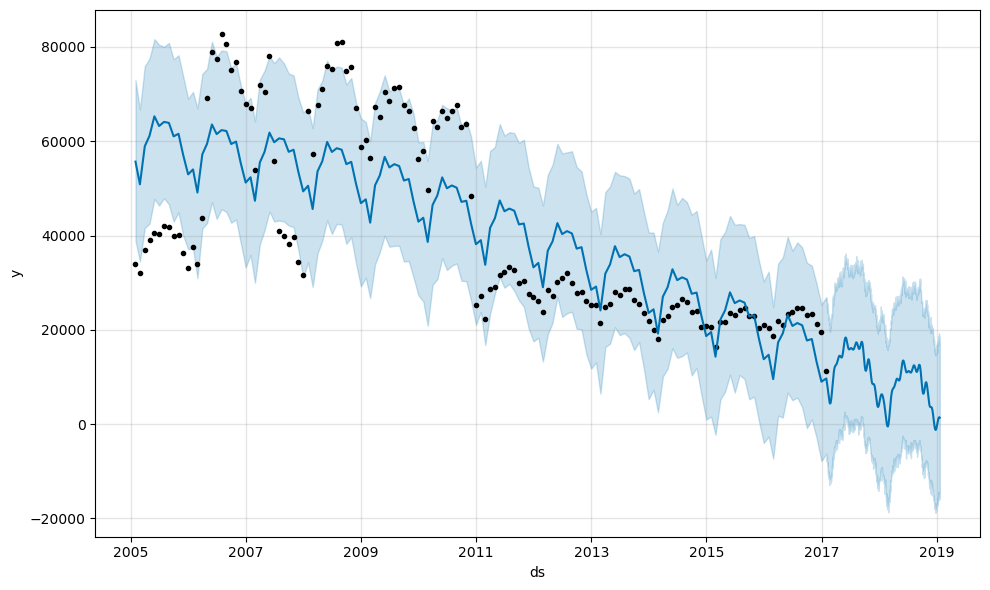

In [36]:
figure = m.plot(forcast)

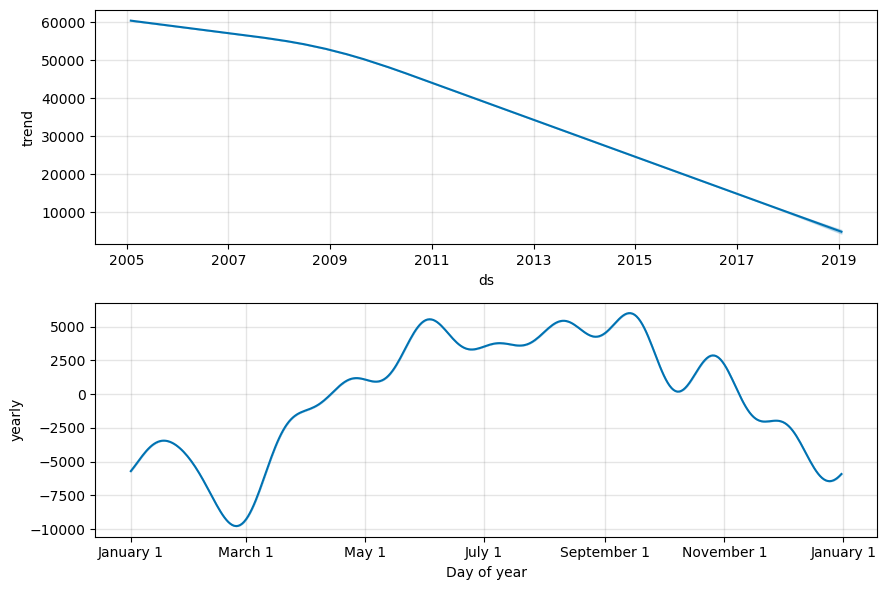

In [37]:
figure = m.plot_components(forcast)